[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/cohmathonc/BIOSCI544/blob/master/BIOSCI544_moranProcess.ipynb)

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [0]:


def plotCircle(ax,x0,y0,r,c): 
  t=np.linspace(0,2*np.pi) 
  x=r*np.sin(t)+x0
  y=r*np.cos(t)+y0 
  ax.fill(x,y,color=c) 
def iniPicture(N): 
  nr=np.ceil(np.sqrt(N/0.5))+1 
  rs=np.linspace(1,nr+1,nr)[:-1] 
  ts=np.linspace(0,2*np.pi,2*nr)[:-1]
  pos=np.array(list(itertools.product(rs,ts)))
  np.random.shuffle(pos)
  S=np.zeros(N)
  S[0]=1
  pos=np.column_stack((pos[:,0]*np.sin(pos[:,1]),pos[:,0]*np.cos(pos[:,1])))
  pos=pos[:N]+np.random.normal(0,0.1,(N,2))
  PS=np.column_stack((pos,S))
  
  return PS

def plotMoranDyn(Ps,freq,nstep):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 10))
  R=np.random.randint(0,Ps.shape[0],(2,nstep))
  rb=['r','b']
  [plotCircle(ax1,x,y,0.3,rb[int(s)])for x,y,s in Ps]
  ax2.plot(freq,'bo')
  for i in range(nstep):
    i,j=np.random.randint(0,Ps.shape[0],2) 
    Ps[j,2]=Ps[i,2]
    freq.append(Ps[:,2].sum())
    [plotCircle(ax1,x,y,0.3,rb[int(s)])for x,y,s in Ps]
    if len(freq)<10:
      ax2.plot(freq,'-ob')
    else:
      ax2.plot(freq,'-b')

Ps=iniPicture(10)
freq=[1]
interact_manual(plotMoranDyn,Ps=fixed(Ps),freq=fixed(freq),nstep=widgets.IntSlider(value=1,min=1,max=100,step=1));
    

    






interactive(children=(IntSlider(value=1, description='nstep', min=1), Button(description='Run Interact', style…

$P_{i,i-1}=\frac{N-i}{N}\frac{i}{N}$

$P_{i,i+1}=\frac{i}{N}\frac{N-i}{N}$

$P_{i,i}=1-P_{i,i-1}-P_{i,i+1}$

$P=\begin{bmatrix}
1 & 0 & 0 &0&0&0&0&   \\
P_{1,0} & P_{1,1} & P_{1,2} & 0&0 & 0&0&\\
0 & P_{2,1} & P_{2,2} & P_{2,3} & 0&  0& 0&\\
 0&0  & P_{3,2} & P_{3,3} & P_{3,4} & 0&0 & \\
 0& 0 & 0 & \ddots & \ddots & \ddots & 0& \\
 0&  0&0  & 0 &P_{n-1,n-2} & P_{n-1,n-1} & P_{n-1,n} \\
 0&  0&0  & 0 & 0& 0&1
\end{bmatrix}$


In [0]:
def iniP(N): 
  P=np.zeros((N,N)) 
  i=np.arange(N) 
  p=(i[1:]*(N-i[1:]))/N**2 
  P[i[1:-1],i[2:]]=p[:-1]
  P[i[1:-1],i[:-2]]=p[:-1]
  P[i,i]=1-P.sum(1) 
  return P

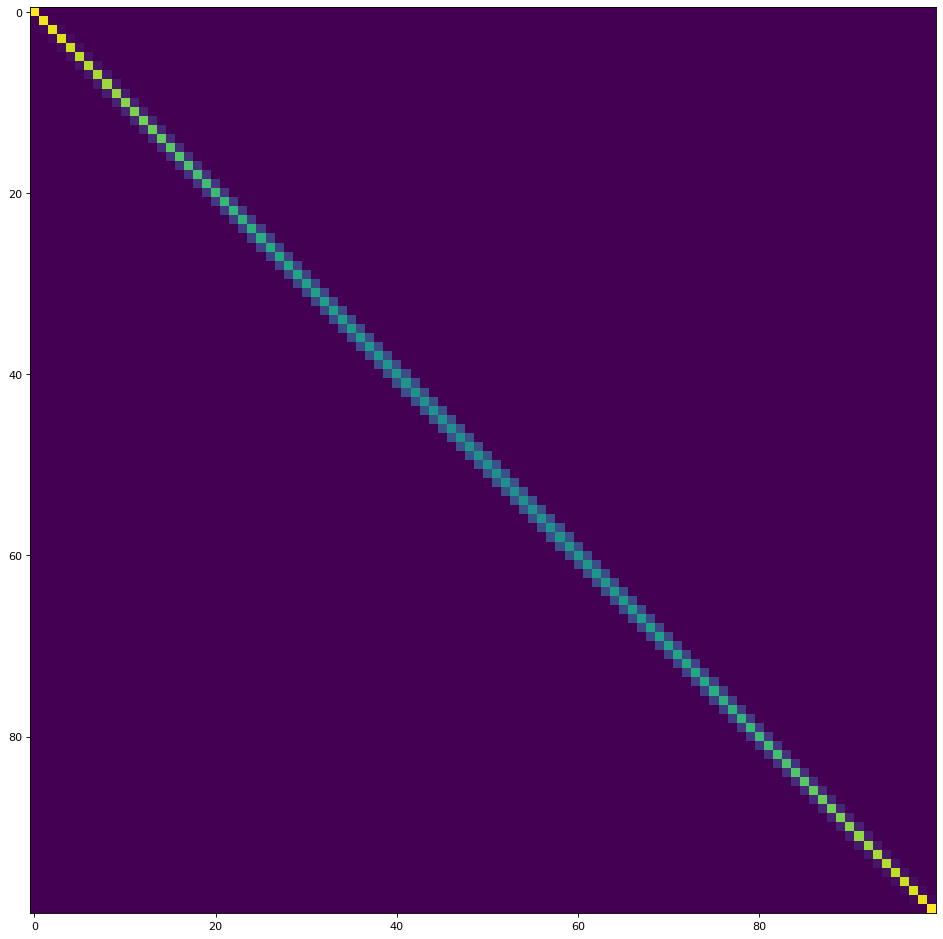

In [0]:
N=100
P=iniP(N)
p=np.zeros(N)
p[50]=1
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(P);


In [0]:
def plotProbDens(P,p,nmax):
  fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
  plt.plot(p)
  for i in range(nmax):
    p=np.dot(p,P)
  plt.plot(p)
  #plt.vlines(np.arange(p.size),np.zeros(p.size),p)
    #print(p)
 # return p
interact_manual(plotProbDens,P=fixed(P),p=fixed(p),nmax=widgets.IntText(value=1,min=1,max=10000,step=1));






interactive(children=(IntText(value=1, description='nmax'), Button(description='Run Interact', style=ButtonSty…

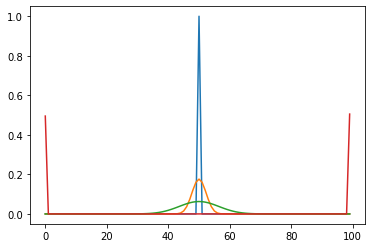

In [0]:
def plotProbDens2(P,p,nmax):
  #plt.plot(p)
  for i in range(nmax):
    p=np.dot(p,P)
  #if nmax>0:
  plt.plot(p)
N=100
P=iniP(N)
p=np.zeros(N)
p[50]=1
[plotProbDens2(P,p,k) for k in (0,10,80,100000)];

In [0]:

def MoranDyn(N,i,nstep):
  Ps=np.zeros(N)
  Ps[:i]=1
  R=np.random.randint(0,Ps.shape[0],(2,nstep))
  #freq=[Ps.sum()]
  for i in range(nstep):
    i,j=np.random.randint(0,Ps.shape[0],2) 
    Ps[j]=Ps[i]
   # freq.append(Ps.sum())
  return Ps.sum()

19.9456


Text(0, 0.5, 'count')

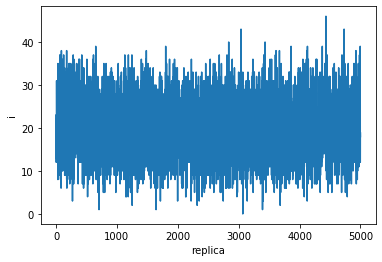

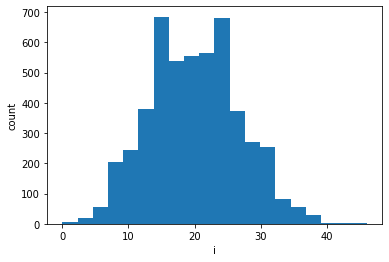

In [0]:
freq=[MoranDyn(50,20,100) for rep in range(5000)]
plt.plot(freq)
plt.xlabel('replica')
plt.ylabel('i')
print(np.mean(freq))
plt.figure()
plt.hist(freq,20)
plt.xlabel('i')
plt.ylabel('count')